In [283]:
import sys
import notebook

print("Python version: " + sys.version)
print("Jupyter notebook version: " + notebook.__version__)

Python version: 3.7.3 (default, Mar 27 2019, 17:13:21) [MSC v.1915 64 bit (AMD64)]
Jupyter notebook version: 5.7.8


# Import Libraries and Data

In [284]:
import re
import math
from datetime import timedelta
# import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
# setting to see all the columns
pd.set_option('display.max_columns', None)

In [285]:
# https://www.kaggle.com/datasets/arashnic/hr-ana/
df = pd.read_csv('train.csv')
df.head() # 54808 rows × 13 columns

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


## Understanding Data
- employee_id: Unique ID for employee
- department: Department of employee
- region: Region of employment (unordered)
- education: Education Level
- gender: Gender of Employee
- recruitment_channel: Channel of recruitment for employee
- no_ of_ trainings: no of other trainings completed in previous year on soft skills, technical skills etc.
- age: Age of Employee
- previous_ year_ rating: Employee Rating for the previous year
- length_ of_ service: Length of service in years
- awards_ won?: if awards won during previous year then 1 else 0
- avg_ training_ score: Average score in current training evaluations
- is_promoted: (Target) Recommended for promotion

In [286]:
df.shape

(54808, 13)

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [288]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,54808.0,39195.830627,22586.581449,1.0,19669.75,39225.5,58730.5,78298.0
no_of_trainings,54808.0,1.253011,0.609264,1.0,1.00,1.0,1.0,10.0
age,54808.0,34.803915,7.660169,20.0,29.00,33.0,39.0,60.0
previous_year_rating,50684.0,3.329256,1.259993,1.0,3.00,3.0,4.0,5.0
length_of_service,54808.0,5.865512,4.265094,1.0,3.00,5.0,7.0,37.0
awards_won?,54808.0,0.023172,0.150450,0.0,0.00,0.0,0.0,1.0
avg_training_score,54808.0,63.386750,13.371559,39.0,51.00,60.0,76.0,99.0
is_promoted,54808.0,0.085170,0.279137,0.0,0.00,0.0,0.0,1.0


In [289]:
# object type is 37 that should be converted to neumeric for a regression model. 
df.dtypes.value_counts()

int64      7
object     5
float64    1
dtype: int64

In [290]:
# Get columns without missing values
columns_without_missing = df.columns[df.notna().all()].tolist()

# Get columns without missing values
columns_without_missing = df.columns[df.notna().all()].tolist()

# Get columns with missing values
columns_with_missing = df.columns[df.isna().any()].tolist()

# Determine the maximum length for alignment
max_length = max(len(columns_without_missing), len(columns_with_missing))

# Make sure both lists have the same length by padding with None if necessary
if len(columns_without_missing) < max_length:
    columns_without_missing += ['-'] * (max_length - len(columns_without_missing))
if len(columns_with_missing) < max_length:
    columns_with_missing += ['-'] * (max_length - len(columns_with_missing))

# Get the names of columns with the 'object' data type
object_columns = df.select_dtypes(include='object').columns.tolist()

# Make sure the lengths of all lists match
max_length_all = max(max_length, len(object_columns))

if len(columns_without_missing) < max_length_all:
    columns_without_missing += ['-'] * (max_length_all - len(columns_without_missing))
if len(columns_with_missing) < max_length_all:
    columns_with_missing += ['-'] * (max_length_all - len(columns_with_missing))
if len(object_columns) < max_length_all:
    object_columns += ['-'] * (max_length_all - len(object_columns))

# Create a DataFrame to store the combined results
combined_df = pd.DataFrame({    
    'ColumnsWithMissingValues': columns_with_missing,
    'ColumnsWithoutMissingValues': columns_without_missing,
    'ObjectColumns': object_columns
})

# Count the number of columns 
num_columns_with_missing = len(columns_with_missing)
print(f"Number of columns with missing values: {num_columns_with_missing}")

# Display the combined DataFrame
combined_df

Number of columns with missing values: 11


,ColumnsWithMissingValues,ColumnsWithoutMissingValues,ObjectColumns
0,education,employee_id,department
1,previous_year_rating,department,region
2,-,region,education
3,-,gender,gender
4,-,recruitment_channel,recruitment_channel
5,-,no_of_trainings,-
6,-,age,-
7,-,length_of_service,-
8,-,awards_won?,-
9,-,avg_training_score,-


## Visualisation of null values

In [291]:
# sorting columns in descending order 
sorted_cols = df.isnull().sum().sort_values(ascending=False).index

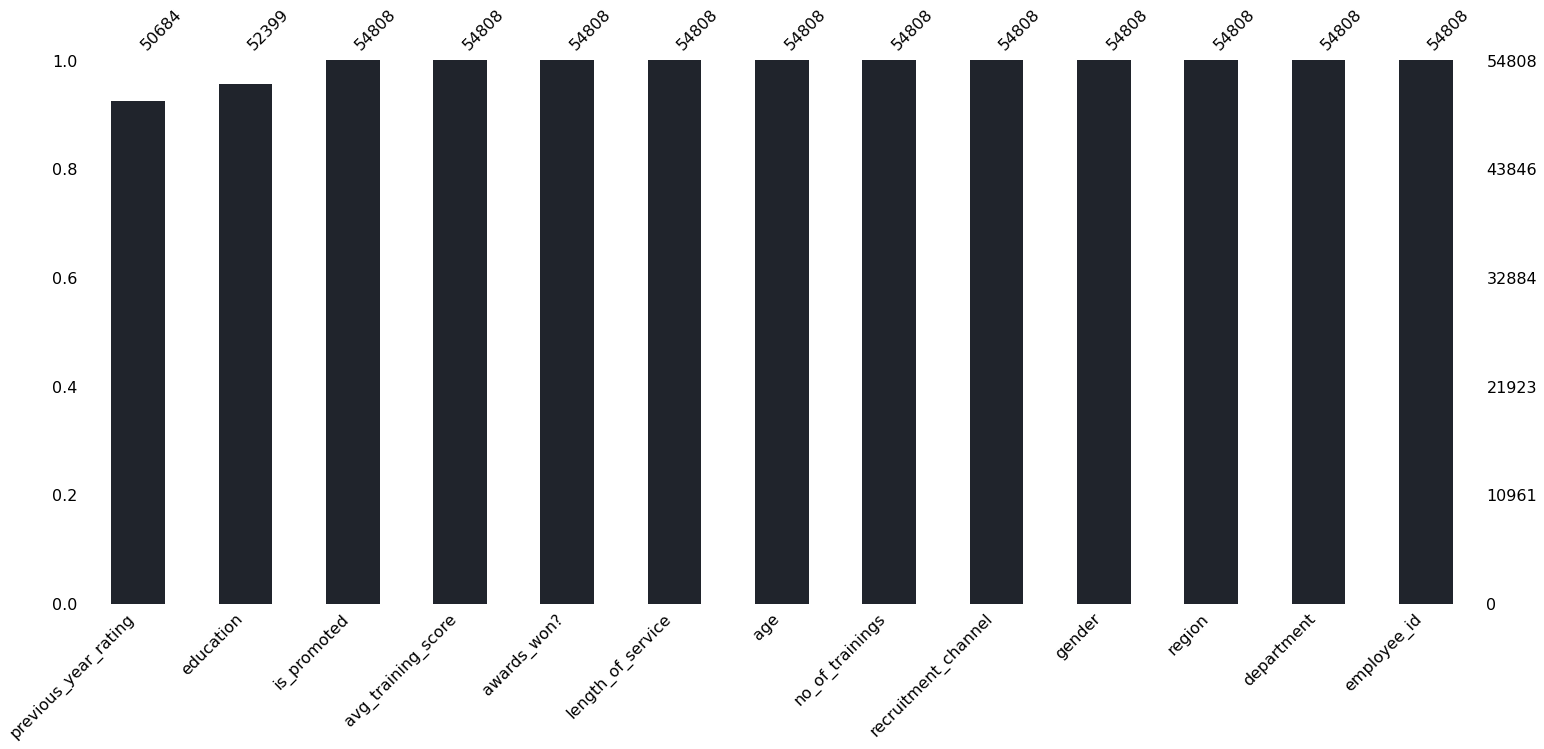

In [292]:
# values as a bar chart
msno.bar(df[sorted_cols], color='#20242c')
# Visualize the number of missing
plt.show()

# EDA Visualisation

## Bar Charts

In [293]:
df['is_promoted']

0        0
1        0
2        0
3        0
4        0
        ..
54803    0
54804    0
54805    0
54806    0
54807    0
Name: is_promoted, Length: 54808, dtype: int64

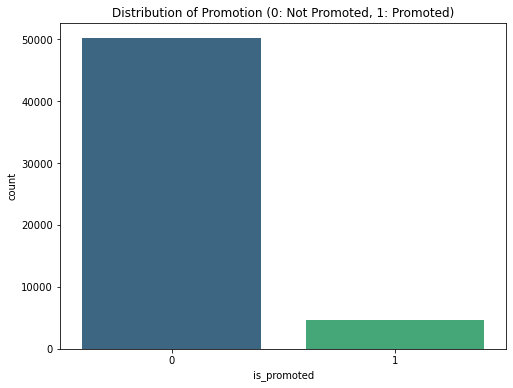

In [294]:
# 'is_promoted' 
plt.figure(figsize=(8, 6))
sns.countplot(x='is_promoted', data=df, palette='viridis')
plt.title('Distribution of Promotion (0: Not Promoted, 1: Promoted)')
plt.show()

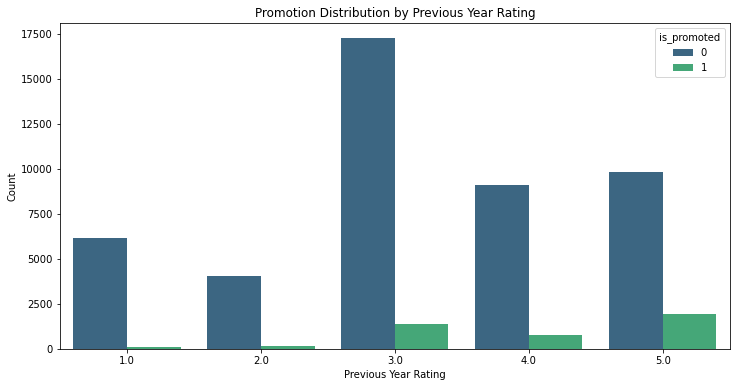

In [295]:
plt.figure(figsize=(12, 6))
sns.countplot(x='previous_year_rating', hue='is_promoted', data=df, palette='viridis')
plt.title('Promotion Distribution by Previous Year Rating')
plt.xlabel('Previous Year Rating')
plt.ylabel('Count')
plt.show()

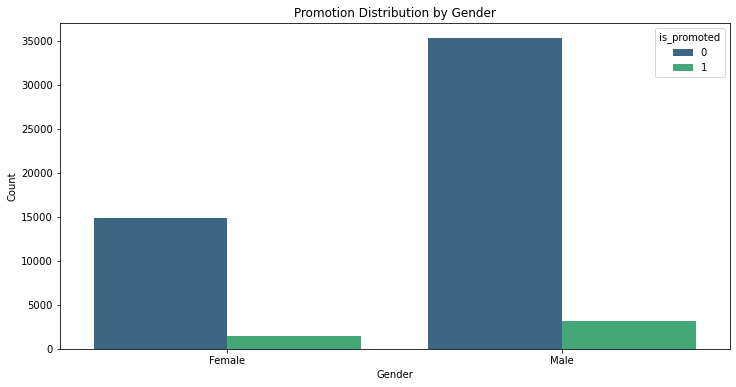

In [296]:
plt.figure(figsize=(12, 6))
sns.countplot(x='gender', hue='is_promoted', data=df, palette='viridis')
plt.title('Promotion Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Label of x-axis 
plt.xticks([0, 1], ['Female', 'Male'])

plt.show()

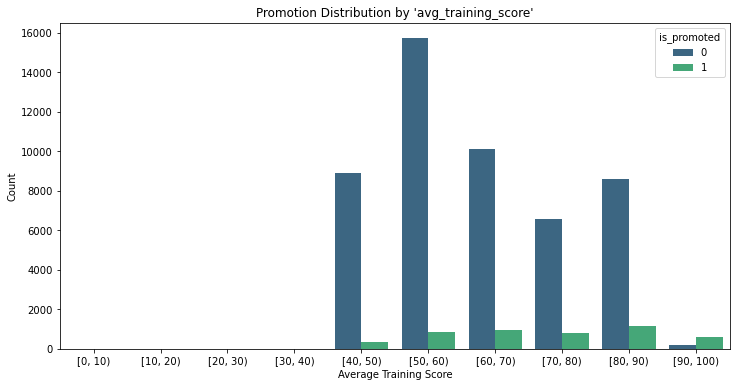

In [297]:
plt.figure(figsize=(12, 6))
sns.countplot(x=pd.cut(df['avg_training_score'], bins=range(0, 101, 10), right=False), hue='is_promoted', data=df, palette='viridis')
plt.title("Promotion Distribution by 'avg_training_score'")
plt.xlabel('Average Training Score')
plt.ylabel('Count')

plt.show()

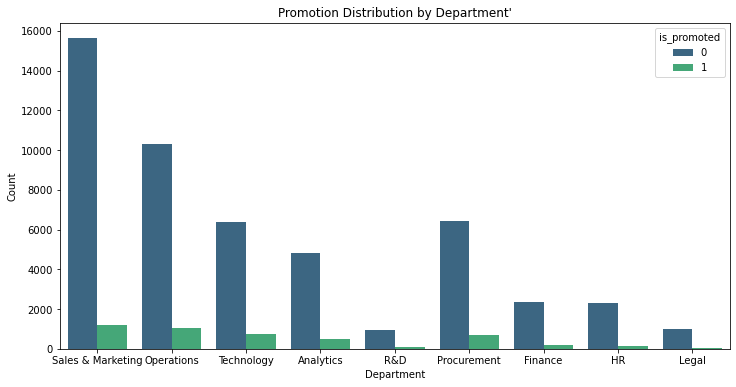

In [298]:
plt.figure(figsize=(12, 6))
sns.countplot(x='department', hue='is_promoted', data=df, palette='viridis')
plt.title("Promotion Distribution by Department'")
plt.xlabel('Department')
plt.ylabel('Count')

# # Label of x-axis 
# plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['Sales & Marketing', 'Operations', 
#                                          'Technology', 'Analytics', 'R&D', 'Procurement', 'Finance', 'HR', 'Legal'] )
plt.show()

# Preprocessing

## Mapping

### Null values for 'education' column

In [299]:
df['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

In [300]:
unique_values = df['education'].unique()

# create mapping dictionary
education_mapping = {
    np.nan: 0,
    'Below Secondary': 1,
    "Bachelor's": 2,
    "Master's & above": 3
}

df['education'] = df['education'].map(education_mapping)

In [301]:
df['education'].unique()

array([3, 2, 0, 1], dtype=int64)

### 'gender' & 'recruitment_channel' & department

In [302]:
print(df['gender'].unique())
print(df['recruitment_channel'].unique())

['f' 'm']
['sourcing' 'other' 'referred']


In [304]:
# 'gender'  
gender_mapping = {'f': 1, 'm': 2}
df['gender'] = df['gender'].map(gender_mapping)

# 'recruitment_channel'  
recruitment_channel_mapping = {'sourcing': 1, 'referred': 2, 'other': 3}
df['recruitment_channel'] = df['recruitment_channel'].map(recruitment_channel_mapping)

# 'department'  
department_mapping = {
    'Sales & Marketing': 1,
    'Operations': 2,
    'Technology': 3,
    'Analytics': 4,
    'R&D': 5,
    'Procurement': 6,
    'Finance': 7,
    'HR': 8,
    'Legal': 9
}
df['department'] = df['department'].map(department_mapping)

### bins=7 for 'avg_training_score' and 'age'

In [305]:
df['avg_training_score_group'] = pd.cut(df['avg_training_score'], bins=5, labels=[1, 2, 3, 4, 5]).astype(int)
df['age_group'] = pd.cut(df['age'], bins=5, labels=[1, 2, 3, 4, 5]).astype(int)

# drop orginal columns
df = df.drop(['avg_training_score', 'age'], axis=1)

In [306]:
print(df['avg_training_score_group'].unique())
print(df['age_group'].unique())

[1 2 3 4 5]
[2 3 4 1 5]


## Encoding values for 'region' column

In [307]:
print(df['region'].unique())

['region_7' 'region_22' 'region_19' 'region_23' 'region_26' 'region_2'
 'region_20' 'region_34' 'region_1' 'region_4' 'region_29' 'region_31'
 'region_15' 'region_14' 'region_11' 'region_5' 'region_28' 'region_17'
 'region_13' 'region_16' 'region_25' 'region_10' 'region_27' 'region_30'
 'region_12' 'region_21' 'region_8' 'region_32' 'region_6' 'region_33'
 'region_24' 'region_3' 'region_9' 'region_18']


In [308]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['region_encoded'] = label_encoder.fit_transform(df['region'])

print(df['region_encoded'].unique())

[31 14 10 15 18 11 12 27  0 28 21 24  6  5  2 29 20  8  4  7 17  1 19 23
  3 13 32 25 30 26 16 22 33  9]


In [309]:
print(df['region_encoded'].unique())

[31 14 10 15 18 11 12 27  0 28 21 24  6  5  2 29 20  8  4  7 17  1 19 23
  3 13 32 25 30 26 16 22 33  9]


In [310]:
# label_encoder.inverse_transform(df['region_encoded'])

## Drop columns

In [311]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,awards_won?,is_promoted,avg_training_score_group,age_group,region_encoded
0,65438,1,region_7,3,1,1,1,5.0,8,0,0,1,2,31
1,65141,2,region_22,2,2,3,1,5.0,4,0,0,2,2,14
2,7513,1,region_19,2,2,1,1,3.0,7,0,0,1,2,10
3,2542,1,region_23,2,2,3,2,1.0,10,0,0,1,3,15
4,48945,3,region_26,2,2,3,1,3.0,2,0,0,3,4,18


In [312]:
# 'employee_id', 'department', 'region' 열 제거
df = df.drop(['employee_id', 'region'], axis=1)
df

,department,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,awards_won?,is_promoted,avg_training_score_group,age_group,region_encoded
0,1,3,1,1,1,5.0,8,0,0,1,2,31
1,2,2,2,3,1,5.0,4,0,0,2,2,14
2,1,2,2,1,1,3.0,7,0,0,1,2,10
3,1,2,2,3,2,1.0,10,0,0,1,3,15
4,3,2,2,3,1,3.0,2,0,0,3,4,18
...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3,2,2,1,1,3.0,17,0,0,4,4,5
54804,2,3,1,3,1,2.0,6,0,0,2,3,19
54805,4,2,2,3,1,5.0,3,0,0,4,1,0
54806,1,0,2,1,1,1.0,2,0,0,1,2,33


## Fill null values of 'previous_year_rating'

In [313]:
df['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [314]:
df['previous_year_rating'].isna().sum()

4124

In [315]:
# Split data into has_nan & has_not_nan to fill null values with more reliable values than 0 or average value.
has_nan = df[df['previous_year_rating'].isna()]
has_not_nan = df.dropna(subset=['previous_year_rating'])

In [316]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# features VS target
X_not_nan = has_not_nan.drop(['previous_year_rating'], axis=1)
y_not_nan = has_not_nan['previous_year_rating']

# train VS validation set splitting
X_train, X_valid, y_train, y_valid = train_test_split(X_not_nan, y_not_nan, test_size=0.2, random_state=123)

# fitting with XGBoost 
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# # prediction on validation sets
# valid_preds = model.predict(X_valid)
# # performance
# mse = mean_squared_error(y_valid, valid_preds)
# print(f'Mean Squared Error on Validation Set: {mse}')

# prediction on has_nan data set
X_nan = has_nan.drop(['previous_year_rating'], axis=1)
predicted_ratings = model.predict(X_nan)

# fill nan values with predicted values
df.loc[df['previous_year_rating'].isna(), 'previous_year_rating'] = predicted_ratings


In [317]:
df['previous_year_rating'].unique()

array([5.        , 3.        , 1.        , ..., 2.94803286, 3.28285575,
       3.8567903 ])

In [318]:
# rounding
df['previous_year_rating'] = df['previous_year_rating'].round(0).astype(int)
df['previous_year_rating'].unique()

array([5, 3, 1, 4, 2, 0], dtype=int64)

# Modeling

In [359]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split

In [344]:
first_column = df.pop('is_promoted')
df.insert(0, 'is_promoted', first_column)

# bergamo_df
x = df.iloc[:, 1: ]
y = df.iloc[:, 0: 1]

# train / test split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.2, random_state = 123)

# Assuming y is a DataFrame, convert it to a numpy array and then ravel
train_y = train_y.values.ravel()
test_y = test_y.values.ravel()

print('Training Features Shape:', train_x.shape)
print('Training Labels Shape:', train_y.shape)
print('Testing Features Shape:', test_x.shape)
print('Testing Labels Shape:', test_y.shape)

Training Features Shape: (43846, 11)
Training Labels Shape: (43846,)
Testing Features Shape: (10962, 11)
Testing Labels Shape: (10962,)


In [352]:
train_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## Random Forest

In [353]:
# Create RandomForestClassifier model
rf_classifier = RandomForestClassifier(random_state=123)

# fitting
rf_classifier.fit(train_x, train_y)

# prediction
predictions = rf_classifier.predict(test_x)

# test accuracy
accuracy = accuracy_score(test_y, predictions)

# conf_matrix, class_report
conf_matrix = confusion_matrix(test_y, predictions)
class_report = classification_report(test_y, predictions)

# outputs
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9201787994891443

Confusion Matrix:
[[9838  227]
 [ 648  249]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     10065
           1       0.52      0.28      0.36       897

    accuracy                           0.92     10962
   macro avg       0.73      0.63      0.66     10962
weighted avg       0.90      0.92      0.91     10962



## XGBoost

In [360]:
# Create XGBoost Classifier model
xgb_classifier = XGBClassifier()

# fitting
xgb_classifier.fit(train_x, train_y)

# prediction
predictions = xgb_classifier.predict(test_x)

# test accuracy
accuracy = accuracy_score(test_y, predictions)

# conf_matrix, class_report
conf_matrix = confusion_matrix(test_y, predictions)
class_report = classification_report(test_y, predictions)

# outputs
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:40:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.9352307972997628

Confusion Matrix:
[[10017    48]
 [  662   235]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     10065
           1       0.83      0.26      0.40       897

    accuracy                           0.94     10962
   macro avg       0.88      0.63      0.68     10962
weighted avg       0.93      0.94      0.92     10962



## SVM
- Too slow

In [358]:
# Create Support Vector Machine (SVM) model
svm_classifier = SVC()

# fitting
svm_classifier.fit(train_x, train_y)

# prediction
predictions = svm_classifier.predict(test_x)

# test accuracy
accuracy = accuracy_score(test_y, predictions)

# conf_matrix, class_report
conf_matrix = confusion_matrix(test_y, predictions)
class_report = classification_report(test_y, predictions)

# outputs
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9181718664477285

Confusion Matrix:
[[10065     0]
 [  897     0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10065
           1       0.00      0.00      0.00       897

    accuracy                           0.92     10962
   macro avg       0.46      0.50      0.48     10962
weighted avg       0.84      0.92      0.88     10962



C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ohhom\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## KNN

In [355]:
# Create KNeighborsClassifier model
knn_classifier = KNeighborsClassifier()

# fitting
knn_classifier.fit(train_x, train_y)

# prediction
predictions = knn_classifier.predict(test_x)

# test accuracy
accuracy = accuracy_score(test_y, predictions)

# conf_matrix, class_report
conf_matrix = confusion_matrix(test_y, predictions)
class_report = classification_report(test_y, predictions)

# outputs
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9189016602809706

Confusion Matrix:
[[10010    55]
 [  834    63]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     10065
           1       0.53      0.07      0.12       897

    accuracy                           0.92     10962
   macro avg       0.73      0.53      0.54     10962
weighted avg       0.89      0.92      0.89     10962



# Prediction

## Data processing for df2

In [365]:
df2 = pd.read_csv('test.csv')
df2.head() 

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


In [366]:
unique_values = df2['education'].unique()

# create mapping dictionary
education_mapping = {
    np.nan: 0,
    'Below Secondary': 1,
    "Bachelor's": 2,
    "Master's & above": 3
}

df2['education'] = df2['education'].map(education_mapping)

In [367]:
# 'gender'  
gender_mapping = {'f': 1, 'm': 2}
df2['gender'] = df2['gender'].map(gender_mapping)

# 'recruitment_channel'  
recruitment_channel_mapping = {'sourcing': 1, 'referred': 2, 'other': 3}
df2['recruitment_channel'] = df2['recruitment_channel'].map(recruitment_channel_mapping)

# 'department'  
department_mapping = {
    'Sales & Marketing': 1,
    'Operations': 2,
    'Technology': 3,
    'Analytics': 4,
    'R&D': 5,
    'Procurement': 6,
    'Finance': 7,
    'HR': 8,
    'Legal': 9
}
df2['department'] = df2['department'].map(department_mapping)

In [368]:
df2['avg_training_score_group'] = pd.cut(df2['avg_training_score'], bins=5, labels=[1, 2, 3, 4, 5]).astype(int)
df2['age_group'] = pd.cut(df2['age'], bins=5, labels=[1, 2, 3, 4, 5]).astype(int)

# drop orginal columns
df2 = df2.drop(['avg_training_score', 'age'], axis=1)

In [369]:
label_encoder = LabelEncoder()
df2['region_encoded'] = label_encoder.fit_transform(df2['region'])

In [374]:
df2 = df2.drop(['employee_id', 'region'], axis=1)

## Prediction to the new data

In [373]:
predictions_df2 = xgb_classifier.predict(df2)

df2['is_promoted'] = predictions_df2
df2

,department,education,gender,recruitment_channel,no_of_trainings,previous_year_rating,length_of_service,awards_won?,avg_training_score_group,age_group,region_encoded,is_promoted
0,3,2,2,1,1,NaN,1,0,4,1,18,0
1,8,2,1,3,1,3.0,5,0,1,2,28,0
2,1,2,2,3,1,1.0,4,0,1,2,4,0
3,6,2,1,3,3,2.0,9,0,3,2,11,0
4,7,2,2,1,1,4.0,7,0,2,2,21,0
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,9,1,2,1,1,3.0,1,0,2,1,11,0
23486,3,2,2,1,1,3.0,7,0,3,2,17,0
23487,8,2,1,1,1,4.0,4,0,1,1,7,0
23488,6,2,2,1,3,NaN,1,0,3,1,24,0
